<p>
El equipo acordó como tema de investigación el siguiente: Estadisticas sobre las principales causas de muerte<br> 
en distintos países. Los data sets encontrados presentan informacion sobre el numero de muertes por pais por un <br>
determinado periodo de tiempo, pudiendose estas causas agruparse en 6 grandes grupos:<br>
Accidentes, Alimentacion, Clima, Drogas, enfermedades y Violencia. <br>
</p>

Las preguntas que se intentan contestar en especifico son:

<p>
1. cuales son las principales causas de muerte en paises ricos?<br>
2. cuales son las enfermedades con mayor prevalencia en países pobres?<br>
3. cual de los 4 grandes grupos es mas comun en la region cono sur de latinoamericana?<br>
4. que region/paises es mas vulnerable a clima extremos? (es decir, presenta un mayor numero de muertes por condiciones climaticas)<br>
5. en que años hubo un mayor numero de muertes por categoria enfermedad?<br>

<p>para lograr el objetivo, se busco bases de datos sobre las causas de muerte, asi como del PIB per capita (medida de riqueza)</p>

<p>primer lugar, se importan las librerias necesarias, adicional a eso, se expande el numero maximo de<br>
output de pandas, para hacer mas facil la visualizacion de la informacion en formato tabular</p>

In [91]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)


<p>se cargan los dataframes necesarios</p>

In [92]:
causas = pd.read_csv('20220327 annual-number-of-deaths-by-cause.csv')
pib = pd.read_csv('world_country_gdp_usd.csv')
categorias = pd.read_csv('Categories.csv')

<p>iniciaremos con el dataframe causas</p>

In [93]:
causas.head(5)

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0


Se comienza por corregir los nombres de las columnas de la tabla de causas, dejando exclusivamente el nombre de la causa de muerte

In [94]:
causas.columns = causas.columns.str.replace('Deaths - ', '')
causas.columns = causas.columns.str.replace(' - Sex: Both - Age: All Ages \(Number\)', '')
causas.columns

C:\Users\karim\AppData\Local\Temp\ipykernel_11580\1469970223.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  causas.columns = causas.columns.str.replace(' - Sex: Both - Age: All Ages \(Number\)', '')


Index(['Entity', 'Code', 'Year',
       'Number of executions (Amnesty International)', 'Meningitis',
       'Neoplasms', 'Fire, heat, and hot substances', 'Malaria', 'Drowning',
       'Interpersonal violence', 'HIV/AIDS', 'Drug use disorders',
       'Tuberculosis', 'Road injuries', 'Maternal disorders',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure',
       'Nutritional deficiencies', 'Self-harm', 'Conflict and terrorism',
       'Diabetes mellitus', 'Poisonings', 'Protein-energy malnutrition',
       'Terrorism (deaths)', 'Cardiovascular diseases',
       'Chronic kidney disease', 'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Acute hepatitis', 'Alzheimer's disease and other dementias',
       'Parkinson's disease'],
      dtype='object')

<p>en esta parte, empezamos a explorar los datos y familiarizarnos con ellos... primero, <br>
damos una rapida ojeada a la lista de paises en el dataframe</p>

In [95]:
paises = causas.Entity.unique()
paises

array(['Afghanistan', 'Africa', 'African Region', 'African Union',
       'Albania', 'Algeria', 'America', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australasia',
       'Australasia & Oceania', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Bosnia-Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central America & Caribbean',
       'Central Asia', 'Central Europe',
       'Central Europe, Eastern Europe, and Central Asia',
       'Central Latin America', 'Central sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Commonwealth',
       'Commonwealth High Income', 'Commonwealth Lo

<p> contabilizamos los NaN en todo el dataframe para hacer una rapida evaluacion de la calidad de los datos</p>

In [96]:
causas.isna().sum()

Entity                                             0
Code                                            2048
Year                                               0
Number of executions (Amnesty International)    7987
Meningitis                                       244
Neoplasms                                        244
Fire, heat, and hot substances                   244
Malaria                                          244
Drowning                                         244
Interpersonal violence                           244
HIV/AIDS                                         244
Drug use disorders                               244
Tuberculosis                                     244
Road injuries                                    244
Maternal disorders                               244
Lower respiratory infections                     244
Neonatal disorders                               244
Alcohol use disorders                            244
Exposure to forces of nature                  

<p>de este conteo, concluimos un par de cosas... hay una gran cantidad de NaN en varias columnas, llama la atención <br>
que el numero de NaN es similar en la gran mayoria de las columnas, excepto en Terrorism y executions, que son mayor<br>
a continuacion haremos un descrcibe para ver si hace sentido los datos, luego, veremos el tipo de datos en las columnas</p>


In [97]:
causas.dtypes

Entity                                           object
Code                                             object
Year                                              int64
Number of executions (Amnesty International)     object
Meningitis                                      float64
Neoplasms                                       float64
Fire, heat, and hot substances                  float64
Malaria                                         float64
Drowning                                        float64
Interpersonal violence                          float64
HIV/AIDS                                        float64
Drug use disorders                              float64
Tuberculosis                                    float64
Road injuries                                   float64
Maternal disorders                              float64
Lower respiratory infections                    float64
Neonatal disorders                              float64
Alcohol use disorders                           

In [98]:
causas.describe()

,Year,Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,HIV/AIDS,Drug use disorders,Tuberculosis,...,Protein-energy malnutrition,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
count,8254.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,2891.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.448025,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,14441.384519,349.235905,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.642230,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,47987.721059,1917.143788,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,10.000000,0.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.000000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,233.500000,5.000000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,4245.000000,60.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,656314.000000,44490.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


<p>Notamos que casi todos los datos numericos tienen el tipo de dato flotante. El describe resulto no ser tan util <br>
pues para el analisis que nos proponemos, solo realizaremos agregaciones basicas como sumatorias.<br>
luego entonces, procedemos a deshacernos de los NaN, primero utilizando dropna all para ver si hay <br>
renglones enteros en NaN</p>

In [99]:
causas2 = causas.dropna( how='all')

<p>lo guardamos todo en otro objeto para no perder nuestro objeto original, luego vemos el resultado</p>

In [100]:
causas2.describe()

,Year,Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,HIV/AIDS,Drug use disorders,Tuberculosis,...,Protein-energy malnutrition,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
count,8254.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,2891.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.448025,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,14441.384519,349.235905,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.642230,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,47987.721059,1917.143788,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,10.000000,0.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.000000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,233.500000,5.000000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,4245.000000,60.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,656314.000000,44490.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


<p> notamos que los numeros del describe son exactamente lo mismo, por lo que procederemos a hacer un drop basado en un threshold<br>
Recordemos que ni la columna Entity ni Year tienen NaN, al mismo tiempo; las columnas Code, executions y Terrorism tienen mas NaNs<br>
que las otras columnas numericas. consideramos hacer un Threshold de 30, pues consideramos necesario camputar la falta de datos tanto<br>
en la columna Terrorism y Executions, pues NaN en estos casos significa que no hay una cifra al respecto y hace sentido ya que estas<br>
clasificaciones pueden ser dificiles de captuar por lo disruptivo de la situacion que intentan cuantificar. No obstante, el resto<br>
de las columnas numericas esperamos lograr limpiar los NaN.</p>


In [101]:
causas2 = causas.dropna( how='all', thresh= 30)

In [102]:
causas2.describe()

,Year,Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,HIV/AIDS,Drug use disorders,Tuberculosis,...,Protein-energy malnutrition,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
count,8010.000000,8010.000000,8.010000e+03,8010.000000,8010.000000,8010.000000,8010.000000,8.010000e+03,8010.000000,8.010000e+03,...,8010.000000,2657.000000,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8.010000e+03,8010.000000,8.010000e+03,8010.000000
mean,2004.500000,12909.701124,2.983985e+05,4444.838077,31812.044569,12532.637953,15315.848315,4.725143e+04,3469.958926,5.605527e+04,...,14441.384519,312.544976,5.672777e+05,3.614545e+04,1.315012e+05,4.668634e+04,8.261491e+04,4586.226592,3.923395e+04,9367.016979
std,8.655982,41799.388071,8.643901e+05,12111.913749,123035.872293,40095.990735,42888.544878,1.744798e+05,11186.514866,1.837876e+05,...,47987.721059,1918.088623,1.606918e+06,1.028788e+05,4.174924e+05,1.282383e+05,2.253554e+05,16692.425941,1.179772e+05,27358.717966
min,1990.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1997.000000,29.000000,1.934250e+03,35.000000,0.000000,58.000000,76.250000,2.600000e+01,7.000000,6.200000e+01,...,10.000000,0.000000,4.348500e+03,2.810000e+02,5.262500e+02,3.040000e+02,5.990000e+02,3.000000,2.010000e+02,55.000000
50%,2004.500000,294.000000,1.033850e+04,244.000000,1.000000,393.500000,494.000000,4.200000e+02,57.000000,9.560000e+02,...,233.500000,5.000000,2.326550e+04,1.651000e+03,2.960500e+03,2.134000e+03,4.032500e+03,47.000000,1.337000e+03,331.000000
75%,2012.000000,3187.750000,9.186925e+04,1470.750000,2462.000000,3017.750000,4372.500000,9.484500e+03,518.750000,1.037775e+04,...,4245.000000,55.000000,1.663318e+05,1.192175e+04,2.815650e+04,1.680225e+04,2.838875e+04,453.750000,1.186775e+04,2954.000000
max,2019.000000,432524.000000,1.007964e+07,129705.000000,961129.000000,460665.000000,463129.000000,1.844490e+06,128083.000000,1.808478e+06,...,656314.000000,44490.000000,1.856251e+07,1.427232e+06,3.974315e+06,1.472012e+06,2.557689e+06,166405.000000,1.623276e+06,362907.000000


In [103]:
causas2.isna().sum()

Entity                                             0
Code                                            1860
Year                                               0
Number of executions (Amnesty International)    7753
Meningitis                                         0
Neoplasms                                          0
Fire, heat, and hot substances                     0
Malaria                                            0
Drowning                                           0
Interpersonal violence                             0
HIV/AIDS                                           0
Drug use disorders                                 0
Tuberculosis                                       0
Road injuries                                      0
Maternal disorders                                 0
Lower respiratory infections                       0
Neonatal disorders                                 0
Alcohol use disorders                              0
Exposure to forces of nature                  

<p>Se logro limpiar de NaNs las columnas numericas, excepto terrorismo y executions. Como comentamos mas arriba, <br>
se tolerara la presencia de NaN en estas columnas por la naturaleza de lo que intentan representar. En cuanto <br>
a la columna "Code" (codigo del pais de 3 digitos), encontramos NaN. Necesitamos investigar mas para saber <br>
la razon de esto. Para tal fin, crearemos un subset solo con el nombre del pais y el codigo.</p>

In [104]:
paises_nombres = causas2[['Entity', 'Code']]
paises_nombres

,Entity,Code
0,Afghanistan,AFG
1,Afghanistan,AFG
2,Afghanistan,AFG
3,Afghanistan,AFG
4,Afghanistan,AFG
...,...,...
8249,Zimbabwe,ZWE
8250,Zimbabwe,ZWE
8251,Zimbabwe,ZWE
8252,Zimbabwe,ZWE


<p>tras un rapido vistazo al codigo anterior (donde listamos la lista de pais), notamos que hay regiones en la lista...<br>
las regiones no tienen codigo de pais, entonces llenaremos esos NaN con la palabra "region" para continuar la investigacion</p>

In [105]:
paises_nombres.fillna('regiones', inplace=True)

C:\Users\karim\AppData\Local\Temp\ipykernel_11580\1584824943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises_nombres.fillna('regiones', inplace=True)


In [106]:
paises_nombres = paises_nombres.drop_duplicates()

<p>Haremos un query para ver solo las entradas que tienen la palabra "Region" en la columna "Code"</p>

In [107]:
regiones = paises_nombres.query('Code == "regiones"')
display(regiones)


,Entity,Code
30,Africa,regiones
60,African Region,regiones
90,African Union,regiones
180,America,regiones
240,Andean Latin America,regiones
420,Asia,regiones
450,Australasia,regiones
1278,Caribbean,regiones
1365,Central Asia,regiones
1395,Central Europe,regiones


<p>efectivamente notamos que la mayoria son regiones y agregaciones que ya existian en el dataset. Estas agregaciones como <br>
"world bank low income" no son muy descriptivas y no nos dice que paises incluye... nosotros queremos tener mayor control sobre<br>
las definiciones, entonces nos desharemos de ellas. por otro lado, notamos 4 paises que no tienen codigo: Inglaterra, Gales, Irlanda<br>
del norte y Escocia. En la lista de paises al principio vimos que esta el pais Gran Bretaña... confirmaremos que Gran Bretaña es<br>
una suma de estos cuatro paies para poder descartarlos y evitar doble conteo. Para ello haremos una agregacion de estos paises<br>
en una columna para ver si es lo mismo</p>

In [108]:
britanicos_datos = causas2.query("Entity == 'England' | Entity == 'Northern Ireland' | Entity == 'Wales' | Entity == 'Scotland' | Entity == 'United Kingdom'")


In [109]:
comparacion_britanicos = britanicos_datos.groupby('Entity')['Meningitis'].agg(['sum'])
comparacion_britanicos

,sum
Entity,
England,9530.0
Northern Ireland,352.0
Scotland,1111.0
United Kingdom,11589.0
Wales,596.0


<p> Nuestras sospechas se confirman... 9530.0 + 352.0 + 1111.0 + 596.0 es igual a 11589.0 que es el total de Reino Unido... <br>
entonces podemos deshacernos de Inglaterra, Escocia, Gales e Irlanda del Norte ya que estos datos ya estan contabilizados en <br>
la entrada "Reino Unido"</p>

<p>luego entonces, regresamos a nuestro dataset original (causas2) y hacemos los mismo... cambiamos los NaN por "regiones" y después<br>
quitaremos estos renglones del data set. pero primero, cambiaremos los tipo de datos flotantes a enteros</p>

In [110]:
causas2.dtypes

Entity                                           object
Code                                             object
Year                                              int64
Number of executions (Amnesty International)     object
Meningitis                                      float64
Neoplasms                                       float64
Fire, heat, and hot substances                  float64
Malaria                                         float64
Drowning                                        float64
Interpersonal violence                          float64
HIV/AIDS                                        float64
Drug use disorders                              float64
Tuberculosis                                    float64
Road injuries                                   float64
Maternal disorders                              float64
Lower respiratory infections                    float64
Neonatal disorders                              float64
Alcohol use disorders                           

In [111]:
for i in causas2.columns[4:]:
    if i != "Terrorism (deaths)":
        causas2[i]= causas2[i].astype('int')


C:\Users\karim\AppData\Local\Temp\ipykernel_11580\970029877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  causas2[i]= causas2[i].astype('int')


In [112]:
causas2.dtypes


Entity                                           object
Code                                             object
Year                                              int64
Number of executions (Amnesty International)     object
Meningitis                                        int32
Neoplasms                                         int32
Fire, heat, and hot substances                    int32
Malaria                                           int32
Drowning                                          int32
Interpersonal violence                            int32
HIV/AIDS                                          int32
Drug use disorders                                int32
Tuberculosis                                      int32
Road injuries                                     int32
Maternal disorders                                int32
Lower respiratory infections                      int32
Neonatal disorders                                int32
Alcohol use disorders                           

<p>Notamos que nos daba error al intentar cambiar las columnas Terrorismo y Executions... decidimos dejarlas así por ahora.<br>
Ahora si, llenar los NaN por la palabra "regiones" y luego quitar esos renglones del dataset</p>

In [113]:
causas2['Code'] = causas2['Code'].fillna('regiones')


C:\Users\karim\AppData\Local\Temp\ipykernel_11580\2651452497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  causas2['Code'] = causas2['Code'].fillna('regiones')


In [114]:
causas_sin_regiones = causas2.query("Code != 'regiones'")
causas_sin_regiones

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Neoplasms,"Fire, heat, and hot substances",Malaria,Drowning,Interpersonal violence,...,Protein-energy malnutrition,Terrorism (deaths),Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease
0,Afghanistan,AFG,2007,15,2933,15925,481,393,2127,3657,...,2439,1199.0,53962,4490,7222,3346,6458,3437,1402,450
1,Afghanistan,AFG,2008,17,2731,16148,462,255,1973,3785,...,2231,1092.0,54051,4534,7143,3316,6408,3005,1424,455
2,Afghanistan,AFG,2009,0,2460,16383,448,239,1852,3874,...,1998,1065.0,53964,4597,7045,3291,6358,2663,1449,460
3,Afghanistan,AFG,2011,2,2327,17094,448,390,1775,4170,...,1805,1525.0,54347,4785,6916,3318,6370,2365,1508,473
4,Afghanistan,AFG,2012,14,2254,17522,445,94,1716,4245,...,1667,3521.0,54868,4846,6878,3353,6398,2264,1544,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,Zimbabwe,ZWE,2015,NaN,1439,11161,632,2518,770,1302,...,2990,NaN,16649,2108,2751,1956,4202,146,754,215
8250,Zimbabwe,ZWE,2016,NaN,1457,11465,648,2050,801,1342,...,3027,NaN,16937,2160,2788,1962,4264,146,767,219
8251,Zimbabwe,ZWE,2017,NaN,1460,11744,654,2116,818,1363,...,2962,0.0,17187,2196,2818,2007,4342,144,781,223
8252,Zimbabwe,ZWE,2018,NaN,1450,12038,657,2088,825,1396,...,2890,NaN,17460,2240,2849,2030,4377,139,795,227


<p>Ahora procederemos a limpiar el data set de PIB per capita... primero queremos investigar como es el data set</p>

In [115]:
pib.columns

Index(['Country Name', 'Country Code', 'year', 'GDP_USD',
       'GDP_per_capita_USD'],
      dtype='object')

In [116]:
pib['year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

<p>El data set va demasiado en el pasado, nosotros estabamos considerando un recorte temporal de a partir de 1990.. quitaremos el resto</p>

In [117]:
pib_recorte = pib.query("year > 1989")
pib_recorte['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

<p> continuamos la investigacion</p>

In [118]:
pib_recorte.isna().sum()

Country Name            0
Country Code            0
year                    0
GDP_USD               590
GDP_per_capita_USD    593
dtype: int64

In [119]:
pib_recorte.dtypes

Country Name           object
Country Code           object
year                    int64
GDP_USD               float64
GDP_per_capita_USD    float64
dtype: object

<p> nos desharemos de la columna GDP_USD ya que solo nos interesa la columna GDP_per_capita_USD. Ya que el numero per capita <br>
es un cociente, estamos de acuerdo con el tipo de dato. El tipo de dato es correcto para las otras columnas tambien. <br>
Tendremos que investigar mas sobre los NaN en la columna per capita</p>

In [120]:
pib_recorte = pib_recorte.drop('GDP_USD', axis=1)
pib_recorte.columns

Index(['Country Name', 'Country Code', 'year', 'GDP_per_capita_USD'], dtype='object')

In [121]:
comparacion_pib = pd.DataFrame(pib_recorte.groupby('year')['GDP_per_capita_USD'].agg('count'))
comparacion_pib


,GDP_per_capita_USD
year,
1990,226
1991,226
1992,226
1993,228
1994,230
1995,240
1996,240
1997,240
1998,242


In [122]:
pib_recorte.query("year == 2014").isna().sum()

Country Name          0
Country Code          0
year                  0
GDP_per_capita_USD    7
dtype: int64

In [ ]:
pib_recorte.query("year == 2019")

<p>Después de revisar el dataframe, descubrimos que los NaN son en su mayoria en territorios (como Gibraltar o Channel Islands), por lo que<br>
procederemos a deshacernso de los NaN de todo el dataframe en un nuevo objeto llamada pib_recorte_completo.</p>

In [124]:
pib_recorte_completo = pib_recorte.dropna(how="any")
pib_recorte_completo

,Country Name,Country Code,year,GDP_per_capita_USD
7980,Aruba,ABW,1990,12305.387910
7981,Africa Eastern and Southern,AFE,1990,831.202019
7983,Africa Western and Central,AFW,1990,594.725717
7984,Angola,AGO,1990,947.704262
7985,Albania,ALB,1990,617.230435
...,...,...,...,...
16487,Kosovo,XKX,2021,4986.582469
16488,"Yemen, Rep.",YEM,2021,690.759273
16489,South Africa,ZAF,2021,6994.211654
16490,Zambia,ZMB,2021,1120.630171


Renombrar las columnas del dataset pib_recorte_completo

In [125]:
diccionario_renombrar = {
    "Country Name" : "Country",
    "Country Code" : "Code",
    "year" : "Year"
}
pib_recorte_completo = pib_recorte_completo.rename(columns=diccionario_renombrar)    # Renombra columnas

Cambiar las Columnas de enfermedades a Filas, para poder manejar las Categorias

In [126]:
columnas=causas_sin_regiones.columns
causas2F=pd.melt(causas_sin_regiones, id_vars=['Entity', 'Code','Year'],    
                            value_vars=columnas[3:],
                            var_name='Cause',value_name='Deaths')
causas2F 


,Entity,Code,Year,Cause,Deaths
0,Afghanistan,AFG,2007,Number of executions (Amnesty International),15
1,Afghanistan,AFG,2008,Number of executions (Amnesty International),17
2,Afghanistan,AFG,2009,Number of executions (Amnesty International),0
3,Afghanistan,AFG,2011,Number of executions (Amnesty International),2
4,Afghanistan,AFG,2012,Number of executions (Amnesty International),14
...,...,...,...,...,...
202945,Zimbabwe,ZWE,2015,Parkinson's disease,215
202946,Zimbabwe,ZWE,2016,Parkinson's disease,219
202947,Zimbabwe,ZWE,2017,Parkinson's disease,223
202948,Zimbabwe,ZWE,2018,Parkinson's disease,227


In [127]:
categorias.head()

,No,Category,Cause,Causa
0,6,accidentes,Drowning,Ahogo
1,4,accidentes,"Fire, heat, and hot substances","Fuego, calor y sustancias calientes."
2,23,accidentes,Poisonings,envenenamientos
3,11,accidentes,Road injuries,Lesiones en la carretera
4,19,alimentacion,Nutritional deficiencies,Deficiencias nutricionales


Union de tablas:  join o merge

In [128]:
join_Cuasas2F_Categorias = pd.merge(causas2F, categorias, how="inner", left_on = 'Cause', right_on = 'Cause')
join_Cuasas2F_Categorias


,Entity,Code,Year,Cause,Deaths,No,Category,Causa
0,Afghanistan,AFG,2007,Number of executions (Amnesty International),15,1,violencia,Numero de ejecuciones (Amnistia Internacional)
1,Afghanistan,AFG,2008,Number of executions (Amnesty International),17,1,violencia,Numero de ejecuciones (Amnistia Internacional)
2,Afghanistan,AFG,2009,Number of executions (Amnesty International),0,1,violencia,Numero de ejecuciones (Amnistia Internacional)
3,Afghanistan,AFG,2011,Number of executions (Amnesty International),2,1,violencia,Numero de ejecuciones (Amnistia Internacional)
4,Afghanistan,AFG,2012,Number of executions (Amnesty International),14,1,violencia,Numero de ejecuciones (Amnistia Internacional)
...,...,...,...,...,...,...,...,...
202945,Zimbabwe,ZWE,2015,Parkinson's disease,215,33,enfermedad,enfermedad de Parkinson
202946,Zimbabwe,ZWE,2016,Parkinson's disease,219,33,enfermedad,enfermedad de Parkinson
202947,Zimbabwe,ZWE,2017,Parkinson's disease,223,33,enfermedad,enfermedad de Parkinson
202948,Zimbabwe,ZWE,2018,Parkinson's disease,227,33,enfermedad,enfermedad de Parkinson


Realizar Agrupaciones

In [129]:

group_Cause_Deaths = join_Cuasas2F_Categorias.groupby(['Cause',"Entity","Year", "Category"])["Deaths"].agg(['sum'])
group_Cause_Deaths = pd.DataFrame(group_Cause_Deaths)
group_Cause_Deaths = group_Cause_Deaths.rename(columns ={ "sum": "Deaths"})    
group_Cause_Deaths = pd.DataFrame(group_Cause_Deaths)

group_Cause_Deaths.reset_index(inplace=True)
group_Cause_Deaths



,Cause,Entity,Year,Category,Deaths
0,Acute hepatitis,Afghanistan,1990,enfermedad,2985
1,Acute hepatitis,Afghanistan,1991,enfermedad,3092
2,Acute hepatitis,Afghanistan,1992,enfermedad,3325
3,Acute hepatitis,Afghanistan,1993,enfermedad,3601
4,Acute hepatitis,Afghanistan,1994,enfermedad,3816
...,...,...,...,...,...
202945,Tuberculosis,Zimbabwe,2015,enfermedad,11214
202946,Tuberculosis,Zimbabwe,2016,enfermedad,10998
202947,Tuberculosis,Zimbabwe,2017,enfermedad,10762
202948,Tuberculosis,Zimbabwe,2018,enfermedad,10545


<p>Para responder nuestras preguntas, utilizaremos el dato mas reciente disponible</p>

-----

# Respuesta a las preguntas 

### 1. cuales son las principales causas de muerte en paises ricos?


<p> primero, definir cuales son los paises ricos. Tomaremos como recorte temporal el 2018 pues es un año <br>
en el que la mayoria de los paises tienen datos. Buscaremos las enfermedades de los 10 paises mas ricos</P>

In [130]:
pib_recorte_completo_2018 = pib_recorte_completo.query("Year == 2018")
paises_ricos = pib_recorte_completo_2018.sort_values(by=["GDP_per_capita_USD"], ascending=False)
paises_ricos_15 = paises_ricos.head(15)

group_Cause_Deaths_2018 = group_Cause_Deaths.query("Year == 2018")

respuesta1 = pd.merge(paises_ricos_15, group_Cause_Deaths_2018, how="inner", left_on = 'Country', right_on = 'Entity')


respuesta1_sort = respuesta1.sort_values(by=["Deaths"], ascending=False)
respuesta1_sort.drop_duplicates(subset=["Entity"])



,Country,Code,Year_x,GDP_per_capita_USD,Cause,Entity,Year_y,Category,Deaths
300,United States,USA,2018,62805.25376,Cardiovascular diseases,United States,2018,enfermedad,929375
102,Switzerland,CHE,2018,86388.40495,Cardiovascular diseases,Switzerland,2018,enfermedad,23456
135,Norway,NOR,2018,82267.80932,Cardiovascular diseases,Norway,2018,enfermedad,12585
188,Ireland,IRL,2018,79107.60499,Neoplasms,Ireland,2018,enfermedad,10113
254,Singapore,SGP,2018,66859.33834,Neoplasms,Singapore,2018,enfermedad,6697
36,Luxembourg,LUX,2018,117254.74040,Cardiovascular diseases,Luxembourg,2018,enfermedad,1290
267,Qatar,QAT,2018,65907.94843,Cardiovascular diseases,Qatar,2018,enfermedad,1045
201,Iceland,ISL,2018,74469.80406,Cardiovascular diseases,Iceland,2018,enfermedad,701
23,Monaco,MCO,2018,185978.60930,Neoplasms,Monaco,2018,enfermedad,224
69,Bermuda,BMU,2018,113050.73690,Cardiovascular diseases,Bermuda,2018,enfermedad,204


<p>podemos ver que en el caso de los paises ricos, la principal causa de muerte es enfermedad<br>
especificamente relacionadas al corazon y cancer</p>

### 2. cuales son las enfermedades con mayor prevalencia en países pobres?


<p> primero, definir cuales son los paises pobres. Tomaremos como recorte temporal el 2018 pues es un año <br>
en el que la mayoria de los paises tienen datos. Buscaremos las enfermedades de los 10 paises mas pobres</P>

In [131]:

pib_recorte_completo_2018 = pib_recorte_completo.query("Year == 2018")
paises_pobres = pib_recorte_completo_2018.sort_values(by=["GDP_per_capita_USD"], ascending=True)
paises_pobres_10 = paises_pobres.head(10)

group_Cause_Deaths_2018 = group_Cause_Deaths.query("Year == 2018")

respuesta2 = pd.merge(paises_pobres_10, group_Cause_Deaths_2018, how="inner", left_on = 'Country', right_on = 'Entity')


respuesta2_sort = respuesta2.sort_values(by=["Deaths"], ascending=False)
respuesta2_sort.drop_duplicates(subset=["Entity"])


,Country,Code,Year_x,GDP_per_capita_USD,Cause,Entity,Year_y,Category,Deaths
148,Mozambique,MOZ,2018,503.302009,HIV/AIDS,Mozambique,2018,enfermedad,67234
102,Afghanistan,AFG,2018,485.668419,Cardiovascular diseases,Afghanistan,2018,enfermedad,60893
168,Madagascar,MDG,2018,518.401123,Cardiovascular diseases,Madagascar,2018,enfermedad,34374
273,Niger,NER,2018,570.723922,Diarrheal diseases,Niger,2018,enfermedad,29377
51,Somalia,SOM,2018,389.831395,Lower respiratory infections,Somalia,2018,enfermedad,20351
247,Malawi,MWI,2018,544.593459,HIV/AIDS,Malawi,2018,enfermedad,15284
217,Sierra Leone,SLE,2018,533.991533,Malaria,Sierra Leone,2018,enfermedad,11987
3,Burundi,BDI,2018,238.034310,Cardiovascular diseases,Burundi,2018,enfermedad,10468
98,Central African Republic,CAF,2018,475.953814,Tuberculosis,Central African Republic,2018,enfermedad,8648


<p>vemos que igualmente las enfermedades son la principal causa de muerte en paises pobres<br>
sin embargo, la principal diferencia radica que son prevalecientes enfermedades<br>
infecciosas, como HIV, tuberculosis, malaria y diarrea</p>

### 3. cual de los 6 grandes grupos (enfermedades, accidentes, violencia, drogas, alimentacion y condiciones climaticas.) es mas comun en la region del cono sur de latinoamericana?


<p> primero, definimos la region latinoamericana... todos los paises del cono sur <br>
(sin contar venezuela, guyana, guyana francesa y suriname). Usaremos de recorte temporal 2018. </p>

In [132]:
pib_recorte_completo_conosur = pib_recorte_completo_2018.query("Country == 'Colombia' | Country == 'Equador' |  Country == 'Peru' | Country == 'Bolivia' | Country == 'Chile' | Country == 'Paraguay' | Country == 'Brazil' | Country == 'Argentina' | Country == 'Uruguay' ")
pib_recorte_completo_conosur

pib_recorte_completo_2018 = pib_recorte_completo.query("Year == 2018")

group_Cause_Deaths_2018 = group_Cause_Deaths.query("Year == 2018")

respuesta3 = pd.merge(pib_recorte_completo_conosur, group_Cause_Deaths_2018, how="inner", left_on = 'Country', right_on = 'Entity')


respuesta3_sort = respuesta3.sort_values(by=["Deaths"], ascending=False)
respuesta3_sort.drop_duplicates(subset=["Entity"])



,Country,Code,Year_x,GDP_per_capita_USD,Cause,Entity,Year_y,Category,Deaths
69,Brazil,BRA,2018,9151.381732,Cardiovascular diseases,Brazil,2018,enfermedad,386886
3,Argentina,ARG,2018,11795.159390,Cardiovascular diseases,Argentina,2018,enfermedad,100742
135,Colombia,COL,2018,6729.583332,Cardiovascular diseases,Colombia,2018,enfermedad,70281
188,Peru,PER,2018,6958.497262,Neoplasms,Peru,2018,enfermedad,32440
122,Chile,CHL,2018,15772.333480,Neoplasms,Chile,2018,enfermedad,30748
36,Bolivia,BOL,2018,3548.590780,Cardiovascular diseases,Bolivia,2018,enfermedad,15537
254,Uruguay,URY,2018,18703.860290,Neoplasms,Uruguay,2018,enfermedad,9948
201,Paraguay,PRY,2018,5782.784550,Cardiovascular diseases,Paraguay,2018,enfermedad,9661


<p>similar a lo observado en paises de renta alta, en el cono sur latinoamericano, prevalecen las muertes por <br>
enfermedades no infecciosas</p>

### 4. que region/paises es mas vulnerable a clima extremos? (es decir, presenta un mayor numero de muertes por condiciones climaticas)


<p> para este, solo basta con ver que pais registro mas muertes en esta categoria</p>

In [133]:
join_Cuasas2F_Categorias_2018_filtro = join_Cuasas2F_Categorias.query("Category == 'clima' & Year == 2018 ")
join_Cuasas2F_Categorias_2018_filtro_sorted = join_Cuasas2F_Categorias_2018_filtro.sort_values(by=["Deaths"], ascending=False)
join_Cuasas2F_Categorias_2018_filtro_sorted.head(20)

,Entity,Code,Year,Cause,Deaths,No,Category,Causa
110608,World,OWID_WRL,2018,Environmental heat and cold exposure,46295,18,clima,Exposicion al calor y al frio ambiental
107008,India,IND,2018,Environmental heat and cold exposure,11293,18,clima,Exposicion al calor y al frio ambiental
98308,World,OWID_WRL,2018,Exposure to forces of nature,11101,16,clima,Exposicion a las fuerzas de la naturaleza.
109048,Russia,RUS,2018,Environmental heat and cold exposure,9089,18,clima,Exposicion al calor y al frio ambiental
94738,Indonesia,IDN,2018,Exposure to forces of nature,5493,16,clima,Exposicion a las fuerzas de la naturaleza.
105688,China,CHN,2018,Environmental heat and cold exposure,4995,18,clima,Exposicion al calor y al frio ambiental
110308,Ukraine,UKR,2018,Environmental heat and cold exposure,2768,18,clima,Exposicion al calor y al frio ambiental
107248,Japan,JPN,2018,Environmental heat and cold exposure,2085,18,clima,Exposicion al calor y al frio ambiental
110398,United States,USA,2018,Environmental heat and cold exposure,1365,18,clima,Exposicion al calor y al frio ambiental
94708,India,IND,2018,Exposure to forces of nature,1335,16,clima,Exposicion a las fuerzas de la naturaleza.


<p>este resultado fue realmente importante. Vemos que la mayoria de los paises mas vulnerables a clima extremo<br>
tambien son paises de renta media o renta baja (salvo algunas excepciones como Japon, estados unidos, francia)</p>

### 5. en que años hubo un mayor numero de muertes por categoria enfermedad?


<p> para esta pregunta, sumaremos las muertes desde 1990 hasta 2020 por categoria enfermedad</p>

<AxesSubplot:xlabel='Year'>

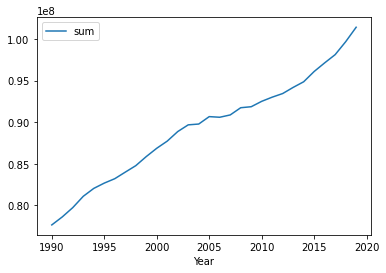

In [134]:
group_Cause_Deaths_enfermedad = group_Cause_Deaths.query("Category == 'enfermedad' ")
respuesta5 = group_Cause_Deaths_enfermedad.groupby(["Year"])["Deaths"].agg(["sum"])
datos5 = respuesta5.sort_values(by=["sum"], ascending=False)

sns.lineplot(data=datos5)

<p>podemos ver que entre 2005 y 2010 hubo una disminucion en la tasa de crecimiento, luego vemos un repunte<br>
poco antes de 2020, lo cual hace sentido debido a la epidemia de covid</p>